In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [7]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

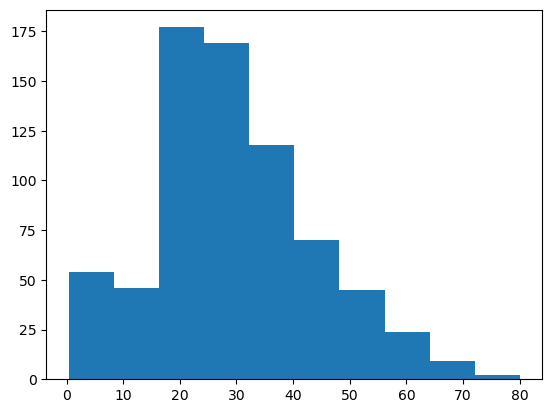

In [23]:
plt.hist(data.Age)

<Axes: xlabel='Cabin', ylabel='Embarked'>

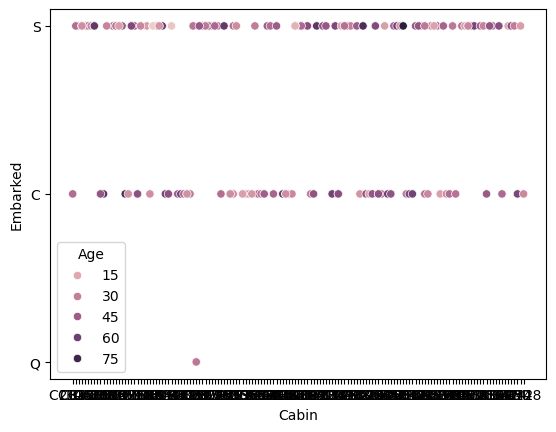

In [25]:
sns.scatterplot(x = "Cabin", y = "Embarked", hue = "Age", data = data)

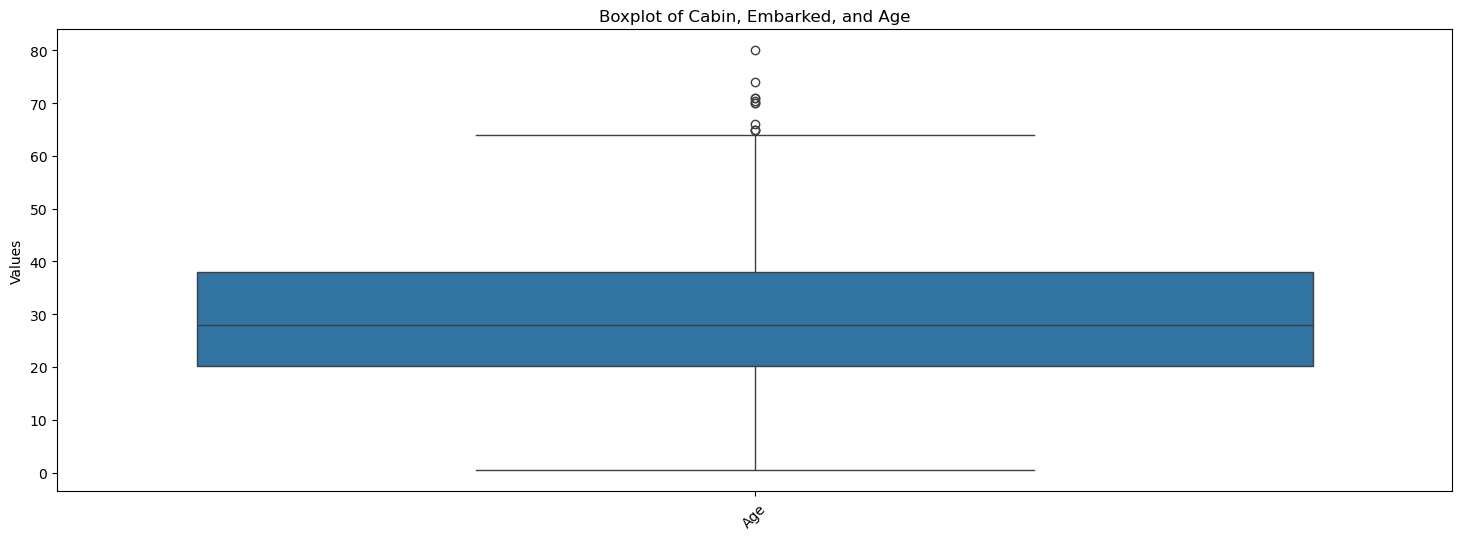

In [31]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data[['Cabin', 'Embarked', 'Age']])  # Remove 'dtype' column
plt.xticks(rotation=45)
plt.title('Boxplot of Cabin, Embarked, and Age')  # Adjust title
plt.ylabel('Values')
plt.show()

In [39]:
predictors_col = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target_col = ["Survived"]

In [41]:
predictors = data[predictors_col]
target = data[target_col]

In [43]:
predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [45]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [53]:
print(predictors.dtypes)
numeric_predictors = predictors.select_dtypes(include=["number"])

corr = numeric_predictors.corr()
print(corr)


Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000


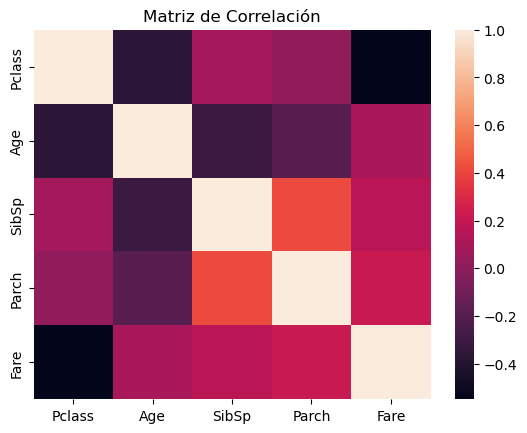

In [55]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

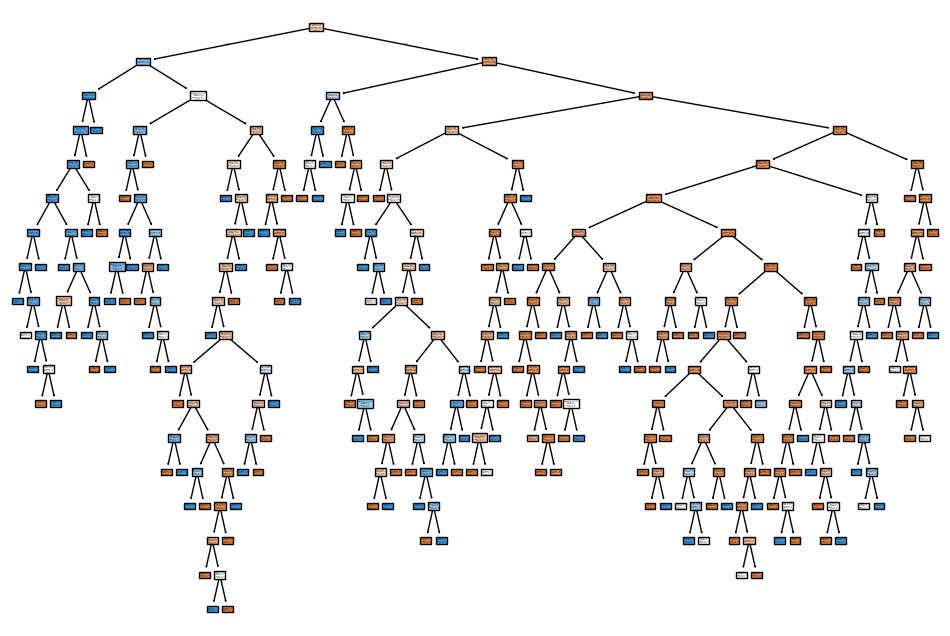

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)
tree = DecisionTreeClassifier(random_state=13)
arbol = tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(arbol, feature_names=predictors.columns, class_names=[str(i) for i in set(y_train)], filled=True)
plt.show()

In [73]:
predicciones = arbol.predict(X_test)

In [75]:
predicciones

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [87]:
import pandas as pd
import numpy as np

predicciones = arbol.predict(X_test)
resultados = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicciones': predicciones 
})

print(resultados)

     Actual  Predicciones
0         0             1
1         0             1
2         0             1
3         0             0
4         0             0
..      ...           ...
174       0             1
175       1             1
176       0             0
177       1             1
178       0             0

[179 rows x 2 columns]


In [91]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.7430167597765364

In [93]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.7527614737288735

In [95]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.7430167597765364

In [97]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.7455799774235526